In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import re

from simulations.unconditional_local_chi2_cpm import get_single_and_double_strain_0_probs, get_expected_counts
from plot_utils.abundance_grouped_heatmaps import add_ticks

In [2]:
base_relative_abundances = [1e-4, 1e-3, 1e-2]

relative_abundances = [relative_abundance * number
                       for relative_abundance 
                       in base_relative_abundances
                       for number in (1,2,5) 
                       for repeat in range(10)]

relative_abundances += [1-sum(relative_abundances)]
frequencies = np.array(relative_abundances)

rate = 2

number_droplets = int(15e6)

In [3]:
single_strain_0_probs, double_strain_0_probs = get_single_and_double_strain_0_probs(frequencies, rate)

expected_counts = np.zeros((frequencies.size, frequencies.size, 4))
for strain1 in range(frequencies.size):
    for strain2 in range(strain1+1, frequencies.size):
        expected_counts[strain1, strain2, :] = get_expected_counts(strain1, strain2, single_strain_0_probs,
                                                               double_strain_0_probs, number_droplets)
        
# this line is annoying but important
expected_counts = expected_counts.reshape((*expected_counts.shape,1))

In [4]:
def get_avg_grouped_pct_diffs(difference_vectors):
    """Changed relative to version for picky_diffs where shape of array is different"""
    # expected counts is a global variable -- very naughty of me to do this...  
    pct_diffs = difference_vectors / (expected_counts + (expected_counts == 0).astype(float))
    relevant_pct_diffs = pct_diffs[...,3,:]
    
    grouped_pct_diffs = {}
    for i in range(9):
        for j in range(i,9):
            if i != j:
                grouped_pct_diffs[i,j] = relevant_pct_diffs[i*10:(i+1)*10,j*10:(j+1)*10,:]
            elif i == j:
                grouped_pct_diffs[i,j] = np.array([])
                for simulation_number in range(500):
                    grouped_pct_diffs[i,j] = np.append(grouped_pct_diffs[i,j], relevant_pct_diffs[...,simulation_number][i*10:(i+1)*10,j*10:(j+1)*10][np.triu_indices(10, k=0)])

    avg_grouped_pct_diffs = np.zeros((9,9))
    for k in range(9):
        for l in range(k,9):
            avg_grouped_pct_diffs[k,l] = np.mean(grouped_pct_diffs[k,l])
    return avg_grouped_pct_diffs

In [5]:
hTPMH = np.load('catpaw_mahjong/simulation_results/unconditional_pairwise_results/all_results.npz')['difference_vectors']
hPoDM_100 = np.load('CPDM_100/simulation_results/unconditional_pairwise_results/all_results.npz')['difference_vectors']
hNBDM_100 = np.load('CNBDM_100/simulation_results/unconditional_pairwise_results/all_results.npz')['difference_vectors']
hPoDM_1 = np.load('CPDM/simulation_results/unconditional_pairwise_results/all_results.npz')['difference_vectors']
hNBDM_1 = np.load('CNBDM/simulation_results/unconditional_pairwise_results/all_results.npz')['difference_vectors']
hExhPoDM = np.load('CECPDM/simulation_results/unconditional_pairwise_results/all_results.npz')['difference_vectors']
hExhNBDM = np.load('CECNBDM/simulation_results/unconditional_pairwise_results/all_results.npz')['difference_vectors']

In [6]:
def plot_stuff(stuff, title):
    
    plt.figure(figsize=(12,9))

    ax = sns.heatmap(stuff, square=True, linewidths=2, linecolor='white',
                     mask=np.tril(np.ones((9,9)).astype(bool), k=-1),
                    cmap='icefire_r', cbar_kws={'pad':0.15}, vmin=-0.105, vmax=0.105)
    ax.yaxis.tick_right()
    ax.xaxis.tick_top()
    add_ticks(ax.xaxis)
    add_ticks(ax.yaxis)
    ax.set_xlabel("Relative Abundance of Strain", fontsize=14, labelpad=15, weight="bold")
    ax.xaxis.set_label_position("top")
    ax.set_ylabel("Relative Abundance of Strain", fontsize=14, labelpad=20, weight="bold",
                 rotation=-90)
    ax.yaxis.set_label_position("right")
    
    cbar = ax.collections[0].colorbar
    cbar.ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))
    
    cbar.ax.set_ylabel('Average % Change Relative to Expected Count', rotation=-90, 
                       fontsize=16, labelpad=20, weight="bold")

    plt.suptitle(title, fontsize=24)
    
    file_title = title.replace(' ', '_')
    file_title = re.sub('[^A-Za-z0-9_]+', '', file_title)
    file_title = re.sub('_[_]+', '_', file_title)
    file_title = '{}.png'.format(file_title)
    plt.savefig(file_title, bbox_inches = "tight")

In [7]:
## Difference 0
def plot_stuff_preprint(stuff, title, fontsize=24):
    
    plt.figure(figsize=(12,9))

    ax = sns.heatmap(stuff, square=True, linewidths=2, linecolor='white',
                     mask=np.tril(np.ones((9,9)).astype(bool), k=-1),
                    cmap='icefire_r', cbar_kws={'pad':0.15}, vmin=-0.105, vmax=0.105)
    ax.yaxis.tick_right()
    ax.xaxis.tick_top()
    add_ticks(ax.xaxis)
    add_ticks(ax.yaxis)
## Difference 1
    ax.set_xlabel("Relative Abundance of Type", fontsize=14, labelpad=15, weight="bold")
    ax.xaxis.set_label_position("top")
## Difference 2
    ax.set_ylabel("Relative Abundance of Type", fontsize=14, labelpad=20, weight="bold",
                 rotation=-90)
    ax.yaxis.set_label_position("right")
    
    cbar = ax.collections[0].colorbar
    cbar.ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))
    
## Difference 3
    cbar.ax.set_ylabel('Average % Change Relative to hPoMu Expected Count', rotation=-90, 
                       fontsize=16, labelpad=20, weight="bold")
## Difference 4
    plt.suptitle(title, fontsize=fontsize)
    
    file_title = title.replace(' ', '_')
    file_title = re.sub('[^A-Za-z0-9_]+', '', file_title)
    file_title = re.sub('_[_]+', '_', file_title)
    file_title = '{}.png'.format(file_title)
    plt.savefig(file_title, bbox_inches = "tight")

## hTPMH

In [8]:
avg_grouped_hTPMH_pct_diffs = get_avg_grouped_pct_diffs(hTPMH)

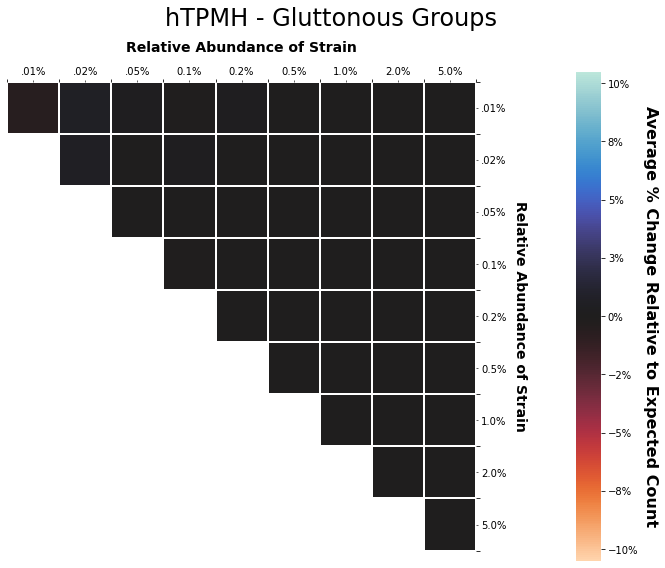

In [9]:
plot_stuff(avg_grouped_hTPMH_pct_diffs, 'hTPMH - Gluttonous Groups')

## hNBDM $\zeta=100$

In [10]:
avg_grouped_hNBDM_100_pct_diffs = get_avg_grouped_pct_diffs(hNBDM_100)

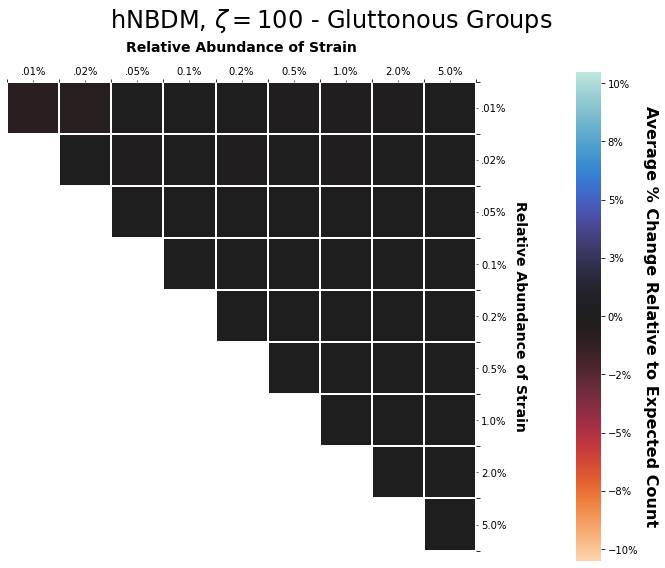

In [11]:
plot_stuff(avg_grouped_hNBDM_100_pct_diffs, 'hNBDM, $\zeta=100$ - Gluttonous Groups')

## hPoDM $\zeta_C=100$

In [12]:
avg_grouped_hPoDM_100_pct_diffs = get_avg_grouped_pct_diffs(hPoDM_100)

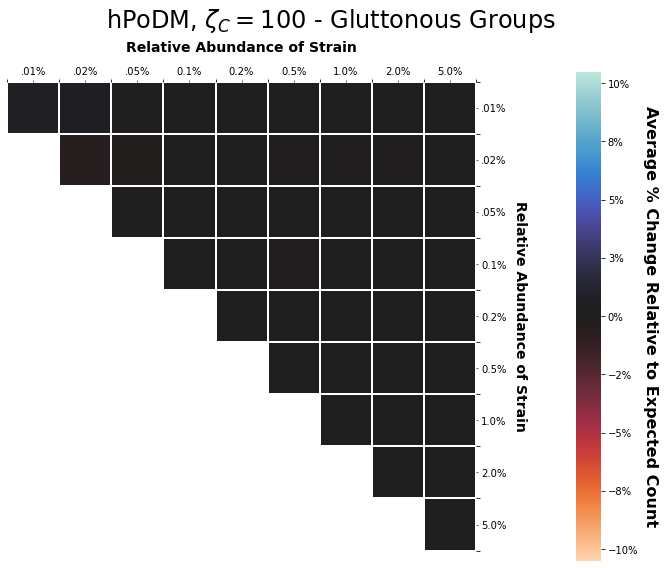

In [13]:
plot_stuff(avg_grouped_hPoDM_100_pct_diffs, 'hPoDM, $\zeta_C=100$ - Gluttonous Groups')

## hNBDM $\zeta=1$

In [14]:
avg_grouped_hNBDM_1_pct_diffs = get_avg_grouped_pct_diffs(hNBDM_1)

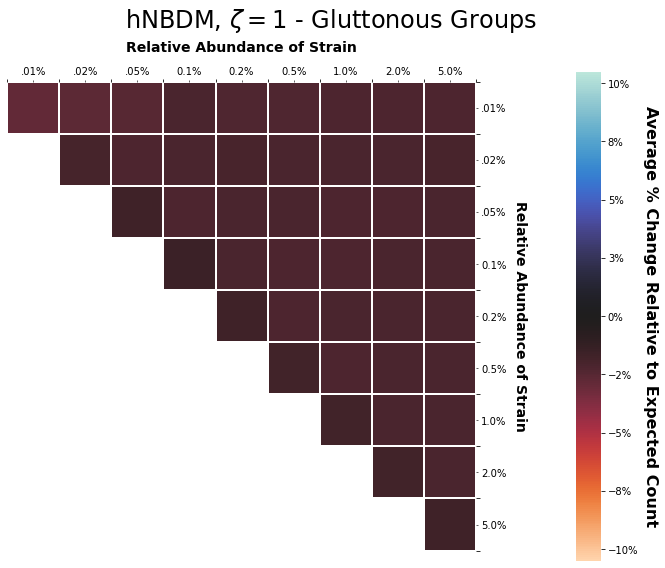

In [15]:
plot_stuff(avg_grouped_hNBDM_1_pct_diffs, 'hNBDM, $\zeta=1$ - Gluttonous Groups')

## hPoDM $\zeta_C=1$

In [16]:
avg_grouped_hPoDM_1_pct_diffs = get_avg_grouped_pct_diffs(hPoDM_1)

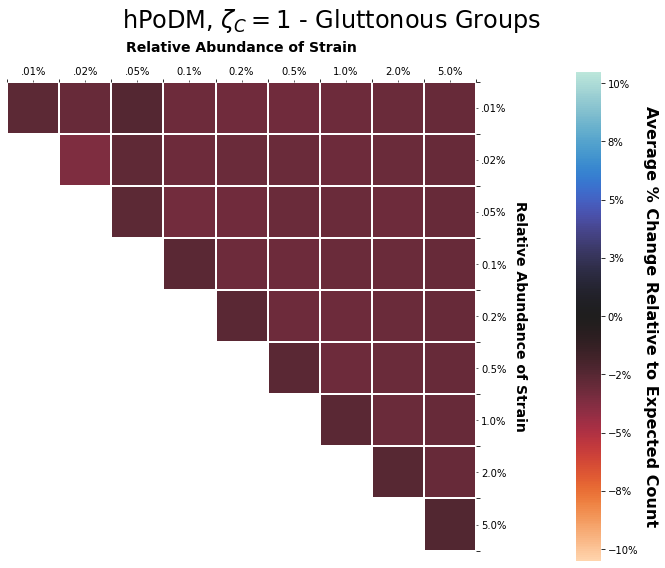

In [17]:
plot_stuff(avg_grouped_hPoDM_1_pct_diffs, 'hPoDM, $\zeta_C=1$ - Gluttonous Groups')

## hExhNBDM

In [18]:
avg_grouped_hExhNBDM_pct_diffs = get_avg_grouped_pct_diffs(hExhNBDM)

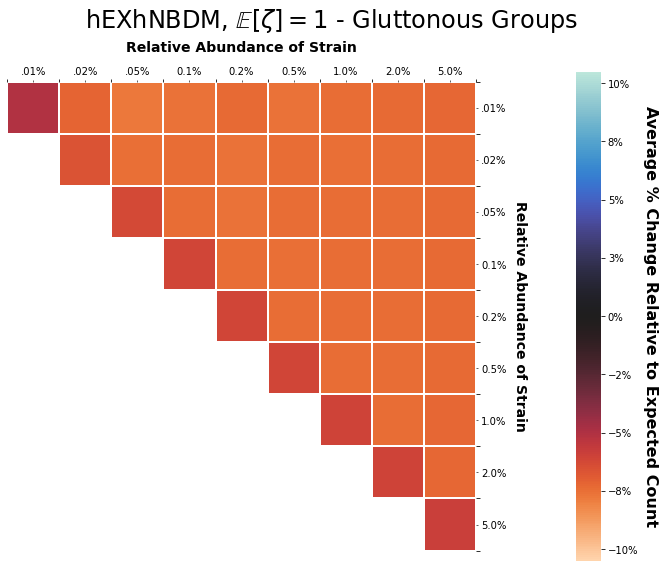

In [19]:
plot_stuff(avg_grouped_hExhNBDM_pct_diffs, 'hEXhNBDM, $\mathbb{E}[\zeta] = 1$ - Gluttonous Groups')

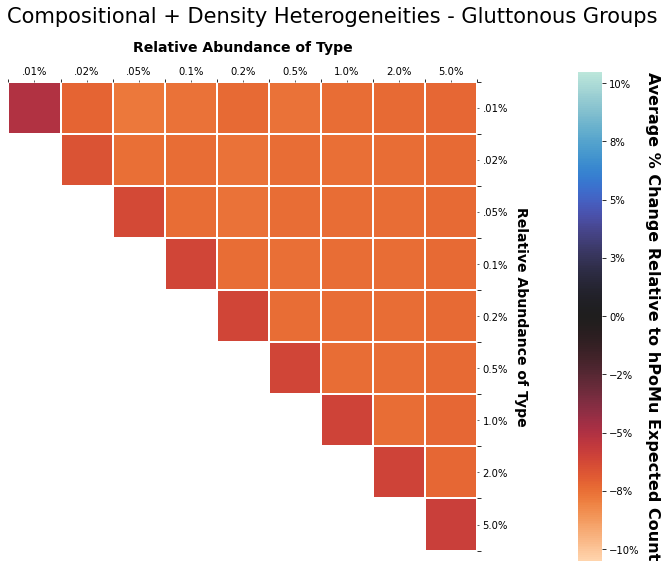

In [20]:
plot_stuff_preprint(avg_grouped_hExhNBDM_pct_diffs, 'Compositional + Density Heterogeneities - Gluttonous Groups', 21)

## hExhPoDM

In [21]:
avg_grouped_hExhPoDM_pct_diffs = get_avg_grouped_pct_diffs(hExhPoDM)

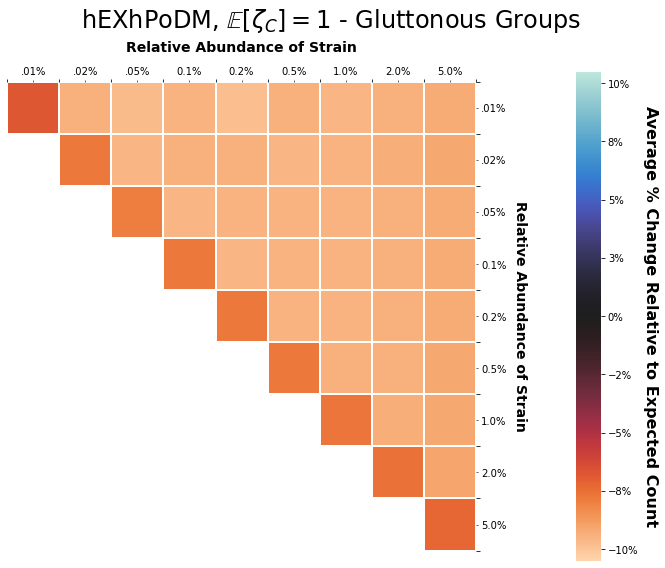

In [22]:
plot_stuff(avg_grouped_hExhPoDM_pct_diffs, 'hEXhPoDM, $\mathbb{E}[\zeta_C] = 1$ - Gluttonous Groups')

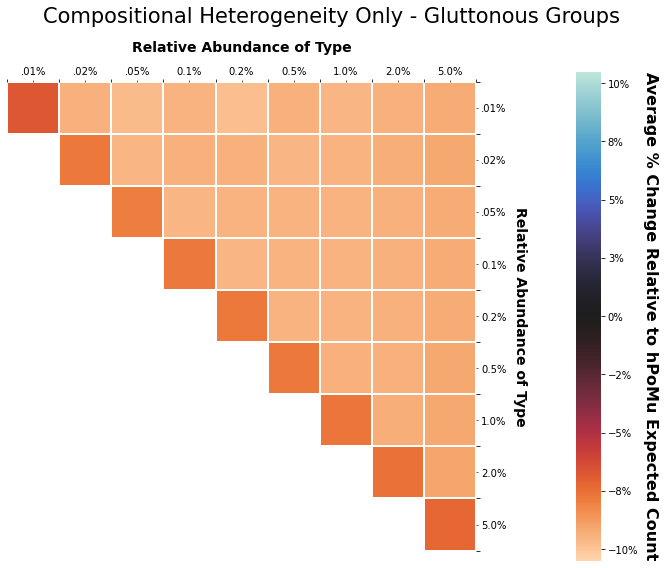

In [23]:
plot_stuff_preprint(avg_grouped_hExhPoDM_pct_diffs, 'Compositional Heterogeneity Only - Gluttonous Groups', 21)